In [1]:
from skimage import io
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

folder = tc.get_folder_path()
image = io.imread(folder + 'MAX_Lund_18.0_22.0_Hours Z-projection t1.tif')



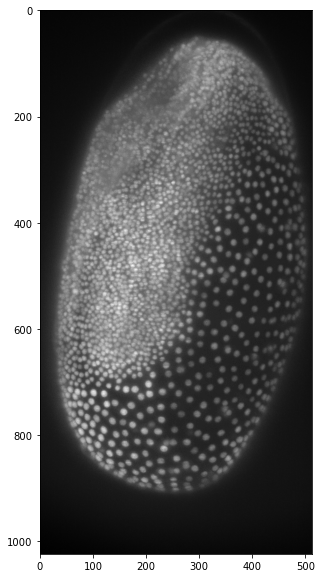

In [2]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(image, cmap = 'gray')

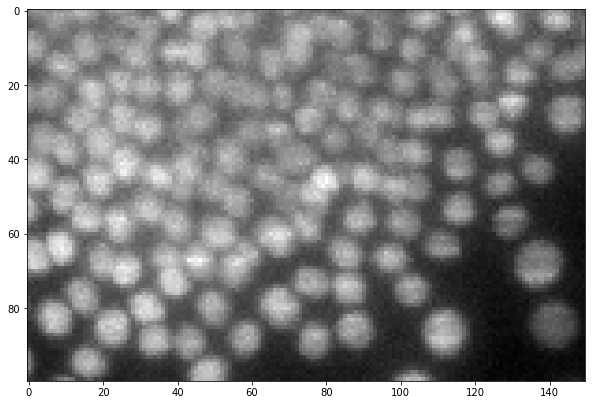

In [21]:
image_crop = image[600:700,100:250]
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(image_crop, cmap = 'gray')

In [22]:
from skimage.filters.rank import minimum, maximum
from skimage.morphology import disk, erosion, dilation

strele = disk(2)
strele

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

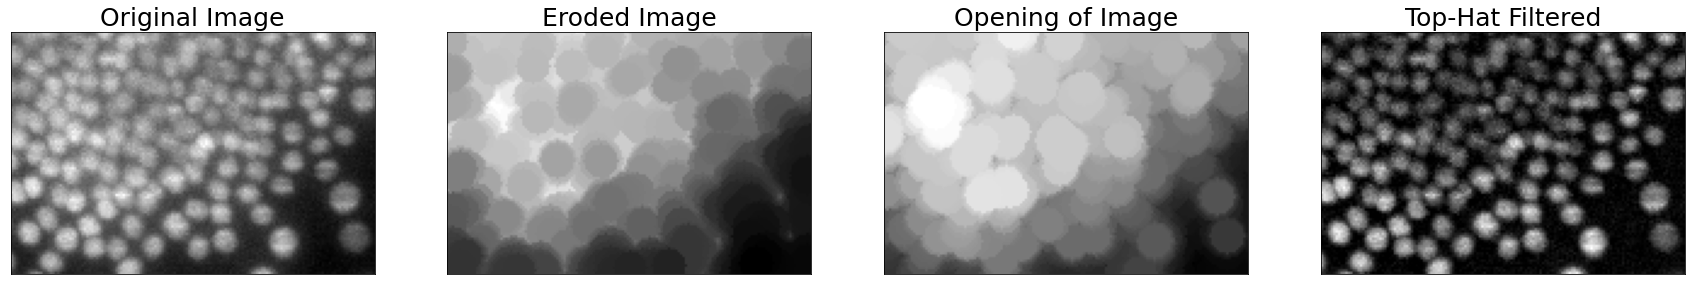

In [26]:
strele7 = disk(7)
min_img = minimum(image_crop, strele7)
max_img = maximum(min_img, strele7)

import matplotlib

def random_cmap(seed = 1):
    import numpy as np
    np.random.seed(seed)
    black = np.zeros((1,3), dtype=float)
    randcmap = np.append(black,(np.random.rand(255,3)),axis=0)
    a_values = np.ones((256,1), dtype=float)
    rgba = np.append(randcmap,a_values, axis = 1)
    
    return rgba

titles1 = ['Original Image', 'Eroded Image', 'Opening of Image', 'Top-Hat Filtered']
tophat_img = image_crop-max_img
images_list = [image_crop, min_img, max_img, tophat_img]
my_cmap = matplotlib.colors.ListedColormap(random_cmap(),)

fig, axs = plt.subplots(1,4, figsize = (30,10))
for i, img in enumerate(images_list):

    axs[i].imshow(img, cmap = 'gray')
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(titles1[i], fontsize=25)

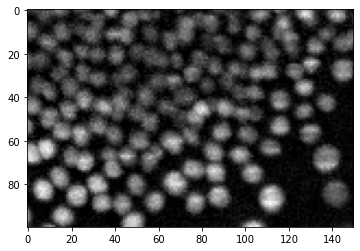

In [24]:
tophat_img = image_crop-max_img
plt.imshow(tophat_img, cmap='gray')



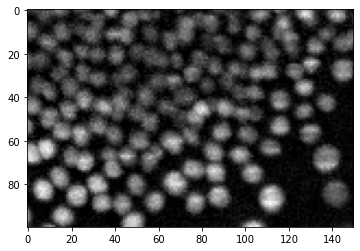

In [25]:
from skimage.morphology import white_tophat
othertophat = white_tophat(image_crop,strele7)
plt.imshow(othertophat, cmap ='gray')

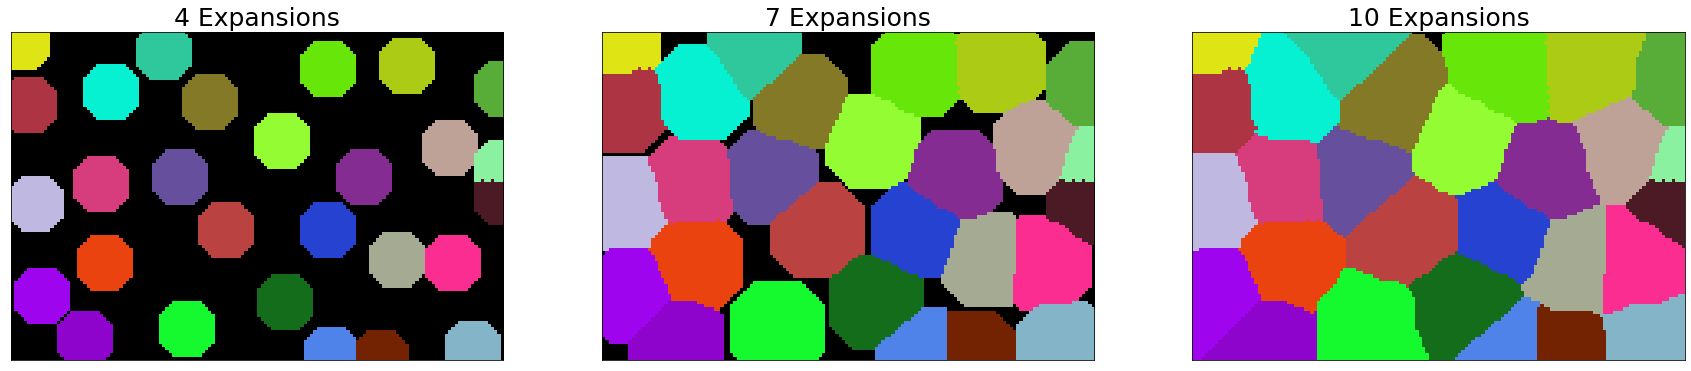

In [95]:
titles2 = ['4 Expansions', '7 Expansions', '10 Expansions']
fig, axs = plt.subplots(1,3, figsize = (30,10))
for i, img in enumerate(images_list[3:]):
    if i >=0:
        axs[i].imshow(img, cmap = my_cmap)
    else:
        axs[i].imshow(img, cmap = 'gray')
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(titles2[i], fontsize=25)